> ### Generate data

In [285]:
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

In [286]:


means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N) # each row is a data point 
X1 = np.random.multivariate_normal(means[1], cov, N)


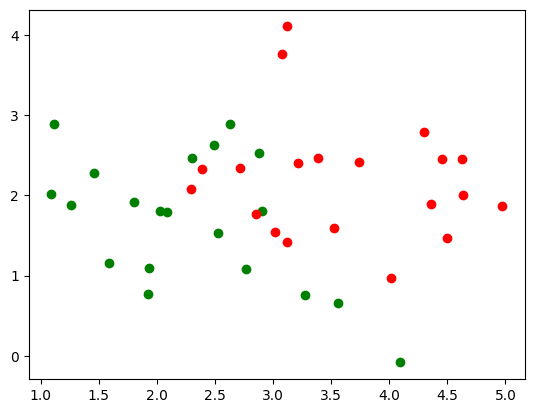

In [287]:
plt.scatter(X0[: , 0] , X0[:, 1] , c='g')
plt.scatter(X1[: , 0] , X1[:, 1] , c='r')


> ### So this I will use SVM to solve this problem by method gradient descent and Hinge loss is cost function

In [288]:
''' 
When we looked at the picture above. I will see  a noise. I believe you will see.
'''

' \nWhen we looked at the picture above. I will see  a noise. I believe you will see.\n'

+ At here, I use soft margin SVM to solve 
+ Soft margin SVM will minimize points be noise and maximum margin 

$(w, b, \xi) = argmin_{w, b, \xi} \frac{1}{2} ||w||^2_2 + C \sum^N_{n=1} \xi_n$

+ In this:
  - $\xi$ is slack variable. 
  - $\xi$ = 0  if this point stay in the safe zone 
  - $0 < \xi < 1$   if this point stay in the not safe zone but still lie in the right class
  - $\xi > 1$ this point lie in the a wrong class
  - C is adjustment the importance between margin and point mistake.

***Loss function Hinge Loss***

- $L_n(w, b) = \sum max(0, 1 - y_n (w^T x_n + b)) + \frac{\lambda}{2} ||w||^2_2$

In [289]:
X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) #

In [290]:
X = np.vstack((X0, X1))

In [291]:
y = np.vstack((np.ones((N,1 )), -np.ones((N,1 )))).reshape((2*N,))
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.])

In [292]:
X0_bar = np.vstack((X0.T, np.ones((1, N)))) # extended data
X1_bar = np.vstack((X1.T, np.ones((1, N)))) 

In [293]:
X1_bar.T[:, 2]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

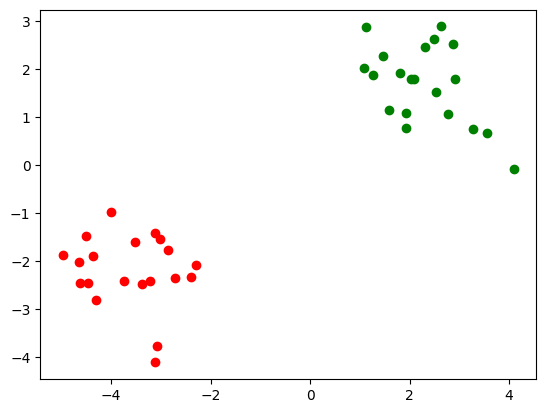

In [294]:
plt.scatter(X0_bar.T[: , 0] , X0_bar.T[:, 1] , c='g')
plt.scatter(-X1_bar.T[: , 0] , -X1_bar.T[:, 1] , c='r')

In [295]:
Z = np.hstack((X0_bar, - X1_bar))
lam = 1./ Z.shape[1]

In [296]:
Z.shape[1]

40

> ### Cost

In [323]:
def cost(w):
    u = w.T@Z
    return np.sum(np.maximum(0, 1. - u)) + 0.5 *lam * np.sum(w*w)  - 0.5*lam*w[-1]*w[-1]

In [324]:
def derivative(w):
    u = w.T@Z
    H = np.where(u < 1)[1]
    d = np.sum(-Z[:, H],  axis = 1, keepdims = True) + lam*w 
    d[-1] -= lam*w[-1]
    return d

### We check derivative by numerical gradient
$ f^{'}(x) = \frac{f(x + e) - f(x - e)}{2e} $
with $e = 10^{-6}$ random

In [325]:
def numerical_grad(w, eps):
    g = np.zeros_like(w)
    for i in range(len(w)):
        w1 = w.copy()
        w2 = w.copy()
        w1[i] += eps
        w2[i] -= eps
        g[i] = (cost(w1) - cost(w2))/(2*eps)
    return g
        

In [326]:
w0 = np.random.randn(X0_bar.shape[0], 1) 
g1 = derivative(w0)
g2 = numerical_grad(w0, 1e-6)
diff = np.linalg.norm(g1 - g2)
print('Gradient different: %f' %diff)

Gradient different: 0.000000


In [301]:
def gradient_descent(w, lda, iter):
    for i in range(iter):
        g = derivative(w)
        w -= lda*g
        if i % 10 ==0:
            print(f'iter {i+1}: cost {cost(w)}')
        if np.linalg.norm(g) < 1e-5:
            break
    return w

In [302]:
w0 = np.random.randn(X0_bar.shape[0], 1) 
w = gradient_descent(w0, 0.001, 1000000)

iter 1: cost [54.786149]
iter 11: cost [51.52040185]
iter 21: cost [49.21234204]
iter 31: cost [46.93627073]
iter 41: cost [44.65879595]
iter 51: cost [42.38546574]
iter 61: cost [40.72002005]
iter 71: cost [39.19829476]
iter 81: cost [37.71679929]
iter 91: cost [36.54855217]
iter 101: cost [35.53380258]
iter 111: cost [34.54099531]
iter 121: cost [33.63711895]
iter 131: cost [32.81779119]
iter 141: cost [32.34145163]
iter 151: cost [31.96034934]
iter 161: cost [31.59582604]
iter 171: cost [31.22500555]
iter 181: cost [30.86429452]
iter 191: cost [30.52276427]
iter 201: cost [30.17250752]
iter 211: cost [29.83295935]
iter 221: cost [29.51356122]
iter 231: cost [29.17703316]
iter 241: cost [28.85415378]
iter 251: cost [28.53228629]
iter 261: cost [28.20774663]
iter 271: cost [27.88139846]
iter 281: cost [27.55507186]
iter 291: cost [27.23119335]
iter 301: cost [26.90936482]
iter 311: cost [26.58609821]
iter 321: cost [26.25985673]
iter 331: cost [25.93363642]
iter 341: cost [25.62087197

In [303]:
w_new = w[:-1].reshape(-1, 1)
b_new = w[-1]

In [308]:
w_new, b_new

(array([[-1.86288258],
        [-1.79406036]]),
 array([8.44916655]))

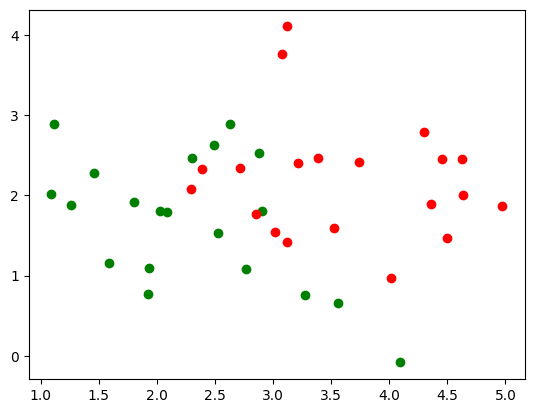

In [309]:
plt.scatter(X0[: , 0] , X0[:, 1] , c='g')
plt.scatter(X1[: , 0] , X1[:, 1] , c='r')


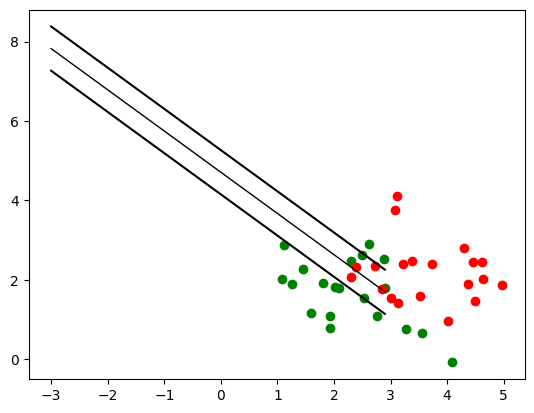

In [310]:
w0 = w[0]
w1 = w[1]
x1 = np.arange(-3, 3, 0.1)
y1 = -w0/w1*x1 - b_new/w1
y2 = -w0/w1*x1 - (b_new-1)/w1
y3 = -w0/w1*x1 - (b_new+1)/w1
plt.plot(x1, y1, 'k', linewidth = 1)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')
plt.scatter(X0[: , 0] , X0[:, 1] , c='g')
plt.scatter(X1[: , 0] , X1[:, 1] , c='r')

In [311]:
'''
REFERENCE: https://machinelearningcoban.com/2017/04/13/softmarginsmv/
'''

'\nREFERENCE: https://machinelearningcoban.com/2017/04/13/softmarginsmv/\n'